In [ ]:
#Student Mark Analytics
#load libraries pandas,numpy
import pandas as pd
import numpy as np

In [ ]:
#Datas Load
import pandas as pd
data=pd.read_csv("Student_Mark_Analytics.csv")

In [ ]:
#create dataframe 
# view the first five records
import pandas as pd
df= pd.DataFrame(data)
df.head()

,Student ID,Name,Gender,Class,Attendance (%),Hours Studied,Mathematics,Physics,Chemistry,Biology,English,Total Marks,Average (%),Result
0,STU1001,Ethan Williams,M,10A,92,3.5,85,78,90,82,88,423,84.6,P
1,STU1002,Sophia Garcia,F,10A,88,4.2,92,95,88,91,94,460,92.0,P
2,STU1003,Liam Johnson,M,10B,75,2.1,58,62,55,60,65,300,60.0,P
3,STU1004,Isabella Martinez,F,10B,96,5.0,89,91,93,87,92,452,90.4,P
4,STU1005,Noah Brown,M,11A,45,1.0,32,28,35,30,55,180,36.0,F


In [ ]:
#Total no of Students
df["Student ID"].count()

np.int64(100)

In [ ]:
#Total No of Students by Gender
Gen_count=df.groupby('Gender')['Student ID'].count()
print(Gen_count)

Gender
F    50
M    50
Name: Student ID, dtype: int64


In [ ]:
#Average marks by each subject
Sub=df[['Mathematics','Physics','Chemistry','Biology','English']].mean()
print(Sub)

Mathematics    73.39
Physics        72.57
Chemistry      73.84
Biology        72.90
English        77.28
dtype: float64


In [ ]:
#Number of students above 80(Toppers_Count)
top_avg=df[df['Average (%)'] > 80]['Name'].count()
print(top_avg)

50


In [ ]:
#Count no of students with their result
df.groupby('Result')['Student ID'].count()

Result
F    14
P    86
Name: Student ID, dtype: int64

In [ ]:
#Top 5 Well Scored Students with marks
Top_Five=df.nlargest(5,'Total Marks')[['Name','Total Marks']]
print(Top_Five)

                 Name  Total Marks
95  Willow Richardson          496
45        Lily Bailey          484
55      Aurora Watson          483
75   Quinn Washington          482
91     Madeline Price          478


In [ ]:
#Student with top score on maths
df.loc[df.sort_values('Mathematics',ascending=False)['Mathematics'].max(),['Name','Class','Total Marks','Result']]

Name           Naomi Henderson
Class                      12A
Total Marks                363
Result                       P
Name: 99, dtype: object

In [ ]:
#Student and his class with low attendance
df.loc[df.sort_values('Attendance (%)',ascending=True)['Attendance (%)'].min(),['Name','Class']]

Name     Owen Morgan
Class            10B
Name: 42, dtype: object

In [ ]:
#Class wise maximum score
df.groupby('Class')['Total Marks'].max()

Class
10A    478
10B    452
11A    496
11B    415
12A    465
Name: Total Marks, dtype: int64

In [ ]:
#Class with maximum Percent
df.groupby('Class')['Average (%)'].max()

Class
10A    95.6
10B    90.4
11A    99.2
11B    83.0
12A    93.0
Name: Average (%), dtype: float64

In [ ]:
#Low attendance candidate
df.loc[df['Attendance (%)'].min(),['Name','Class']]

Name     Owen Morgan
Class            10B
Name: 42, dtype: object

In [ ]:
#Bottom 5 students with low scores
btm_Five=df.nsmallest(5,'Total Marks')[['Name','Total Marks']]
print(btm_Five)

              Name  Total Marks
94    Hunter James          123
84  Aaron Peterson          140
64   Nathan Foster          151
44     John Murphy          155
24     Henry Baker          161


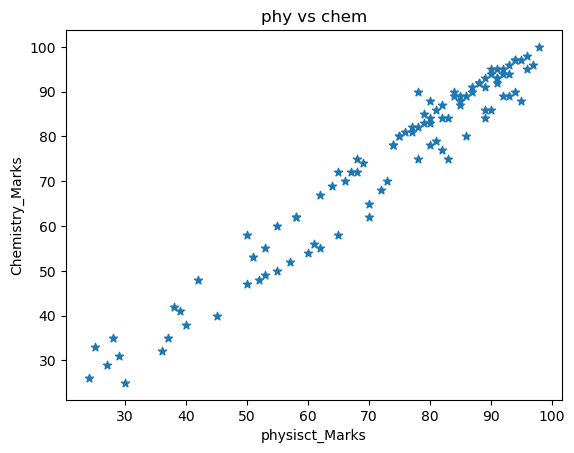

In [ ]:
#Graph a scatter chart for subject 'Physics,Chemistry'
from matplotlib import pyplot as plt
plt.scatter(df['Physics'],df['Chemistry'],marker='*')
plt.title('phy vs chem')
plt.xlabel('physisct_Marks')
plt.ylabel('Chemistry_Marks')
plt.show()

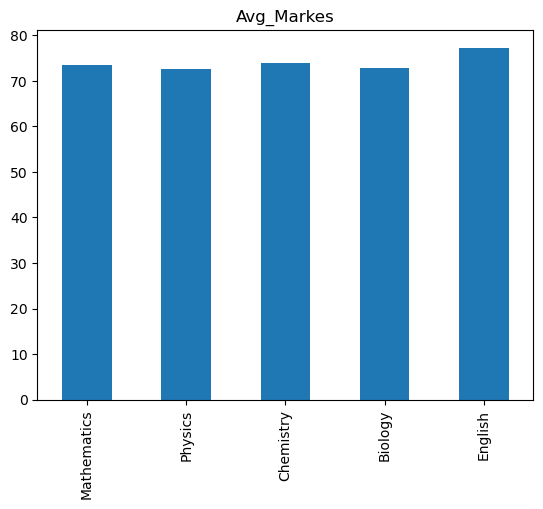

In [ ]:
#Graph a bar chart to visualize a avg marks of all subject
from matplotlib import pyplot as plt
df[['Mathematics','Physics','Chemistry','Biology','English']].mean().plot(kind='bar')
plt.title('Avg_Markes')
plt.show()

In [ ]:
#create a basic pivot view of data with class and students
pivot=df.pivot(values='Total Marks',index='Student ID',columns='Class')
print(pivot)

Class         10A    10B    11A    11B    12A
Student ID                                   
STU1001     423.0    NaN    NaN    NaN    NaN
STU1002     460.0    NaN    NaN    NaN    NaN
STU1003       NaN  300.0    NaN    NaN    NaN
STU1004       NaN  452.0    NaN    NaN    NaN
STU1005       NaN    NaN  180.0    NaN    NaN
...           ...    ...    ...    ...    ...
STU1096       NaN    NaN  496.0    NaN    NaN
STU1097       NaN    NaN    NaN  383.0    NaN
STU1098       NaN    NaN    NaN  415.0    NaN
STU1099       NaN    NaN    NaN    NaN  465.0
STU1100       NaN    NaN    NaN    NaN  363.0

[100 rows x 5 columns]


Text(0, 0.5, 'Gender')

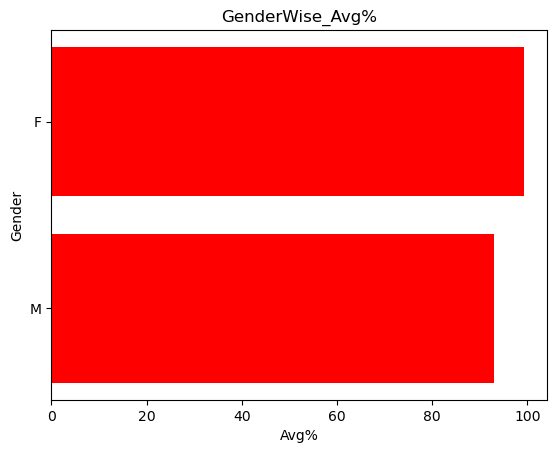

In [ ]:
#Graph a horizontal bar chart for analysing the genderwise student performance
plt.barh(df['Gender'],df['Average (%)'],color='Red')
plt.title('GenderWise_Avg%')
plt.xlabel('Avg%')
plt.ylabel('Gender')

In [ ]:
#List the students who are failed
df.loc[df['Result']=='F','Name']

4           Noah Brown
9         Emma Jackson
14        Elijah Clark
24         Henry Baker
29    Victoria Roberts
34        Samuel Evans
44         John Murphy
49            Nova Cox
54         Dylan James
64       Nathan Foster
74       Thomas Watson
84      Aaron Peterson
92        Cameron Ward
94        Hunter James
Name: Name, dtype: object